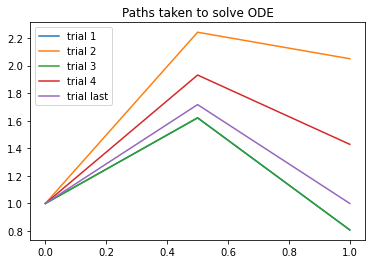

1.0


In [49]:
import numpy as np
import matplotlib.pyplot as plt
def RK4(init):
    h=0.5
    y1=[1]
    y2=[init]
    for i in range(1,3):
        K1=y2[i-1]
        K2=y2[i-1]+0.5*K1*h
        K3=y2[i-1]+0.5*K2*h
        K4=y2[i-1]+0.5*K3*h
        y1.append(y1[i-1]+h*(K1+2*K2+2*K3+K4)/6)
        K1=-1-np.exp(y1[i-1])
        K2=-1-np.exp(y1[i-1])+0.5*K1*h
        K3=-1-np.exp(y1[i-1])+0.5*K2*h
        K4=-1-np.exp(y1[i-1])+0.5*K3*h
        y2.append(y2[i-1]+h*(K1+2*K2+2*K3+K4)/6)
    return y1,y2

def SHT():
    tol=1e-18
    Y=[]
    x=np.linspace(0,1,3)
    init=0
    y1,y2=RK4(init)
    dx0=1
    i=1
    while abs(y1[2]-1)>tol:
        if y1[2]>1:
            init-=dx0
            y1,y2=RK4(init)
            Y.append(y1)
            if y1[2]<1:
                dx0*=0.5
        else:
            init+=dx0
            y1,y2=RK4(init)
            Y.append(y1)
            if y2[2]>1:
                dx0*=0.5
        i+=1
    plt.plot(x,Y[0],label="trial 1")
    plt.plot(x,Y[1],label="trial 2")
    plt.plot(x,Y[2],label="trial 3")
    plt.plot(x,Y[3],label="trial 4")
    plt.plot(x,Y[len(Y)-1],label="trial last")
    plt.legend()
    plt.title("Paths taken to solve ODE")
    plt.savefig("res1.jpg")
    plt.show()
    print(Y[len(Y)-1][2])
SHT()
    

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
1.0


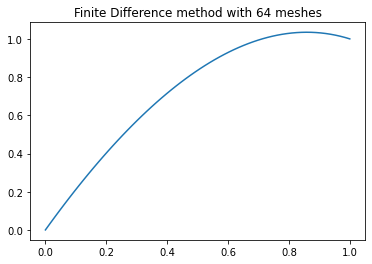

In [47]:
def FD(n):
    dt=1/(n-1)
    A=np.zeros((n,n))
    A[0][0]=1
    A[n-1][n-1]=1
    for i in range(1,n-1):
        A[i][i-1]=1
        A[i][i]=-2
        A[i][i+1]=1
    print(A)
    B=np.zeros(n)
    B[n-1]=1
    for i in range(1,n-1):
        B[i]=-dt**2*(1+np.exp(i*dt))
    res=np.linalg.solve(A,B.transpose())
    return res
x=np.linspace(0,1,64)
res1=FD(64)
plt.plot(x,res1)
plt.title("Finite Difference method with 64 meshes")
plt.savefig("res2.jpg")
print(res1[63])

[[1. 0. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 4.]
 [1. 1. 1. 1.]]
[0.0, 0.6199614404158094, 0.97374372248872, 1.0]


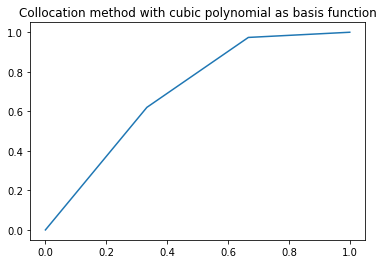

1.0
[[1.   0.   0.   0.   0.  ]
 [0.   0.   2.   1.5  0.75]
 [0.   0.   2.   3.   3.  ]
 [0.   0.   2.   4.5  6.75]
 [1.   1.   1.   1.   1.  ]]
[0.0, 0.48934859771915995, 0.8354061126666894, 1.0153790539668142, 1.0]


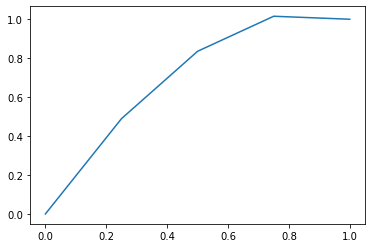

1.0
[[ 1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    2.    1.2   0.48  0.16]
 [ 0.    0.    2.    2.4   1.92  1.28]
 [ 0.    0.    2.    3.6   4.32  4.32]
 [ 0.    0.    2.    4.8   7.68 10.24]
 [ 1.    1.    1.    1.    1.    1.  ]]
[0.0, 0.4022460569938247, 0.7154806159906308, 0.9288426132042258, 1.029076098317691, 1.0]


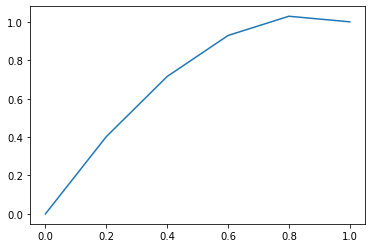

1.0


In [50]:
def poly(coef,t):
    size=len(coef)
    dt=1/(size-1)
    res=[]
    for i in range(0,size):
        tmp=0
        for j in range(0,size):
            tmp+=coef[j]*(i*dt)**j
        res.append(tmp)
    print(res)
    return res
def COL(n):
    dt=1/(n-1)
    A=np.zeros((n,n))
    for i in range(0,n):
        if i==0:
            A[i][i]=1
            continue
        if i==n-1:
            for j in range(0,n):
                A[i][j]=1
        else:
            for j in range(2,n):
                A[i][j]=j*(j-1)*(i*dt)**(j-2)
    print(A)
    B=np.zeros(n)
    B[n-1]=1
    for i in range(1,n-1):
        B[i]=-(1+np.exp(i*dt))
    res=np.linalg.solve(A,B.transpose())
    return res
coef=COL(4)
x=np.linspace(0,1,4)
res2=poly(coef,x) #Plug in the t to the given polynomials
plt.plot(x,res2)
plt.title("Collocation method with cubic polynomial as basis function")
plt.savefig("res3.jpg")
plt.show()
print(res2[3])
coef=COL(5)
x=np.linspace(0,1,5)
res2=poly(coef,x)
plt.plot(x,res2)
plt.show()
print(res2[4])
coef=COL(6)
x=np.linspace(0,1,6)
res2=poly(coef,x)
plt.plot(x,res2)
plt.show()
print(res2[5])